In [11]:
import numpy as np
from scipy.optimize import minimize

# Правая часть f(x)
def f(x):
    return (x**2 + 2*x + 2) / (x + 1)

# Дифференциальный оператор L[u]
def L(u, x):
    u_prime = np.gradient(u, x)
    u_double_prime = np.gradient(u_prime, x)
    return u_double_prime + (x + 1) * u_prime - u

# Базисные функции
def basis_functions(x, N):
    return np.array([x ** i for i in range(N + 1)])

# Аппроксимация решения
def approximate_solution(x, coeffs, basis_funcs):
    return np.dot(coeffs, basis_funcs)

# Интеграл ошибки
def error_integral(coeffs, x, basis_funcs):
    u_N = approximate_solution(x, coeffs, basis_funcs)
    R = L(u_N, x) - f(x)
    return np.trapz(R ** 2, x)

# Граничные условия
def boundary_conditions(coeffs, x, basis_funcs):
    u_N = approximate_solution(x, coeffs, basis_funcs)
    return np.array([u_N[0], u_N[-1] - 2 * np.log(2)])

# Метод Ритца
def solve_ritz_method(N, x_points):
    basis_funcs = basis_functions(x_points, N)
    initial_coeffs = np.zeros(N + 1)

    constraints = (
        {'type': 'eq', 'fun': lambda coeffs: boundary_conditions(coeffs, x_points, basis_funcs)[0]},  # u(0) = 0
        {'type': 'eq', 'fun': lambda coeffs: boundary_conditions(coeffs, x_points, basis_funcs)[1]}  # u(1) = 2ln2
    )

    result = minimize(error_integral, initial_coeffs, args=(x_points, basis_funcs), constraints=constraints)
    optimal_coeffs = result.x
    u_N = approximate_solution(x_points, optimal_coeffs, basis_funcs)

    return optimal_coeffs, u_N

# Параметры
N = 5
x_points = np.linspace(0, 1, 100)

# Решение
optimal_coeffs, u_N = solve_ritz_method(N, x_points)

# Точное решение
exact_solution = (x_points + 1) * np.log(x_points + 1)

# Погрешности
absolute_error = np.abs(u_N - exact_solution)
mse = np.mean(absolute_error ** 2)
max_error = np.max(absolute_error)

# Вывод
print("Коэффициенты:", optimal_coeffs, '\n')
print("Решение:", u_N, '\n')
print("Точное решение:", exact_solution, '\n')
print("Модуль погрешности:", absolute_error, '\n')
print(f"\nMSE: {mse:.6e}, Max Error: {max_error:.6e}")


Коэффициенты: [ 0.          0.99705701  0.52012457 -0.2037044   0.09528314 -0.02246595] 

Решение: [0.         0.01012414 0.02035318 0.03068588 0.04112104 0.0516575
 0.06229408 0.07302967 0.08386314 0.09479342 0.10581942 0.11694012
 0.12815447 0.13946147 0.15086015 0.16234954 0.17392868 0.18559667
 0.19735259 0.20919555 0.22112469 0.23313917 0.24523814 0.25742079
 0.26968633 0.28203399 0.29446299 0.30697259 0.31956207 0.33223072
 0.34497783 0.35780272 0.37070474 0.38368323 0.39673755 0.40986709
 0.42307123 0.43634939 0.44970097 0.46312543 0.4766222  0.49019074
 0.50383053 0.51754105 0.53132179 0.54517227 0.559092   0.57308051
 0.58713735 0.60126206 0.61545421 0.62971336 0.6440391  0.65843102
 0.67288872 0.68741181 0.7019999  0.71665262 0.73136959 0.74615048
 0.76099491 0.77590254 0.79087304 0.80590608 0.82100132 0.83615846
 0.85137717 0.86665715 0.88199809 0.8973997  0.91286167 0.92838373
 0.94396559 0.95960696 0.97530756 0.99106713 1.00688537 1.02276204
 1.03869685 1.05468955 1.070739

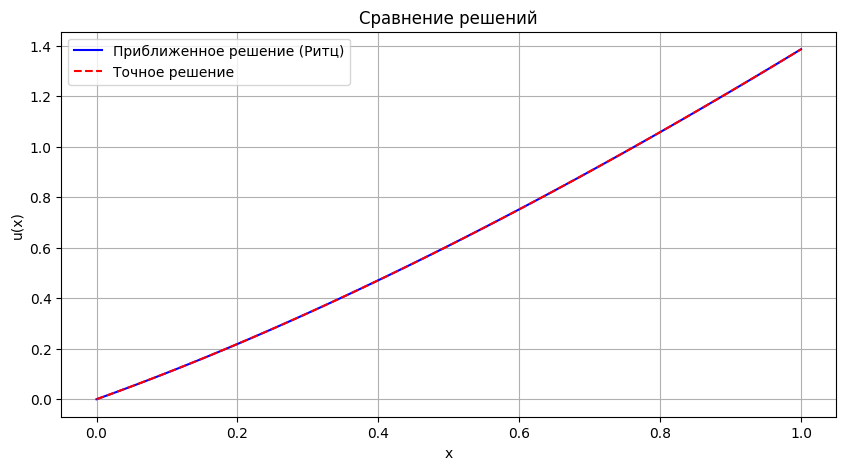

In [16]:
import matplotlib.pyplot as plt

# Построение графика: приближенное и точное решение
plt.figure(figsize=(10, 5))
plt.plot(x_points, u_N, label='Приближенное решение (Ритц)', color='blue')
plt.plot(x_points, exact_solution, label='Точное решение', linestyle='--', color='red')
plt.title('Сравнение решений')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.grid(True)
plt.show()
